# MNIST

AIで数字を認識しましょう！

In [1]:
import numpy as np    
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

In [2]:
# ランダムをコントロールできるため
import os
os.environ["CUDA_DEVICE_ORDER"]    = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'
os.environ["PYTHONHASHSEED"]       = '0'

import random as rnd
from tensorflow import set_random_seed

def set_seed(seed):
    np.random.seed(seed)
    set_random_seed(seed)
    rnd.seed(seed)

## データセット

MNISTは有名なデータセットであり、kerasから簡単にアクセスできるようになっている！

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


中身を確認すると…

In [4]:
# shape
print(x_train.shape)

(60000, 28, 28)


Label: 5


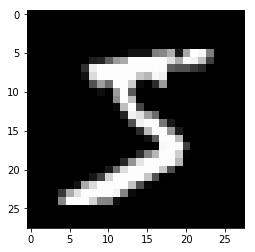

Label: 0


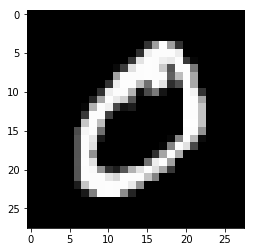

Label: 4


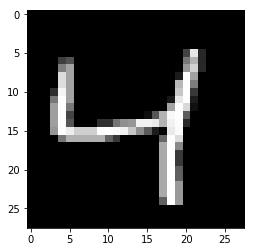

Label: 1


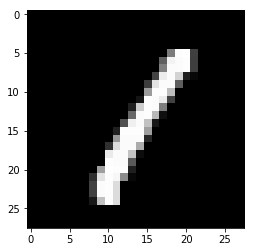

Label: 9


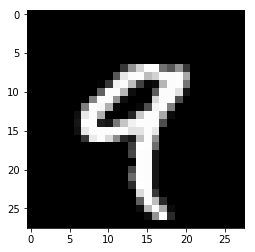

Label: 2


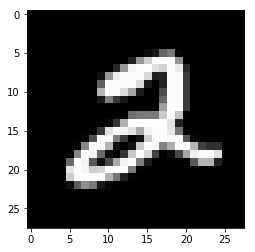

Label: 1


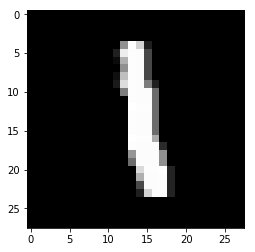

Label: 3


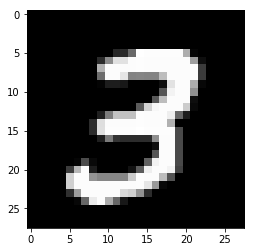

Label: 1


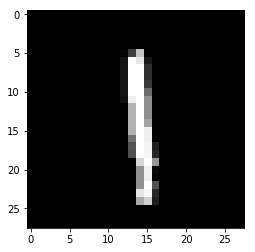

Label: 4


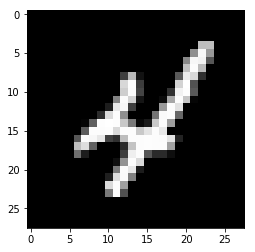

In [5]:
# 最初の10個を表示
for i in range(10):
    print("Label:", y_train[i])
    plt.imshow(x_train[i], cmap="gray")
    plt.show()

## データの準備

- 2次元の画像を1次元に変換
- 正規化（0~255 → 0~1）
- 「0~9」のラベルをOne-Hotに変換

In [6]:
from keras.utils import to_categorical

def prepare_dataset(x, y):
    
    # 2次元の配列を1次元にする
    x = np.reshape(x, (x.shape[0], 784))
    
    # 正規化
    x = x / 255
    
    # One-Hot エンコーディング
    y = to_categorical(y)
    
    return x, y

# 学習と検証データを用意
x_train_p, y_train_p = prepare_dataset(x_train, y_train)
x_test_p, y_test_p = prepare_dataset(x_test, y_test)

## モデルを構築

とりあえず、果物のモデルをベースにしよう。ただし：

- 入力は２個ではなくて、784個
- 出力は４個ではなくて、10個（0～9）

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    x = Input(shape=(784,), dtype=float)
    h = Dense(16, activation="relu")(x)
    y = Dense(10, activation="softmax")(h) 
    
    model = Model(inputs=x, outputs=y)

    return model

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [9]:
model.fit(x_train_p, y_train_p, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.4405 - acc: 0.8766
Epoch 2/25
60000/60000 [==============================] - 1s 23us/step - loss: 0.2450 - acc: 0.9307
Epoch 3/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.2104 - acc: 0.9398
Epoch 4/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.1884 - acc: 0.9455
Epoch 5/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.1749 - acc: 0.9487
Epoch 6/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.1640 - acc: 0.9519
Epoch 7/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.1559 - acc: 0.9543
Epoch 8/25
60000/60000 [==============================] - 1s 23us/step - loss: 0.1489 - acc: 0.9561
Epoch 9/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.1429 - acc: 0.9584
Epoch 10/25
60000/60000 [==============================] - 2s 25us/step - loss: 0.1374 - acc: 0.9594

## 結果確認

In [10]:
# 結果を表示する
def display_result(x_test, y_test, y_pred):

    # AIの出力（信頼）
    max_idx = np.argmax(y_pred)
    confidence = y_pred[max_idx] * 100
    print('認識: %d (%.2f%%) - 正しい：%d'%(max_idx, confidence, y_test))
    
    # 入力画像
    plt.imshow(x_test, cmap="gray")
    plt.show()

認識: 7 (99.92%) - 正しい：7


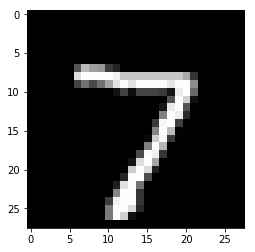

認識: 2 (99.99%) - 正しい：2


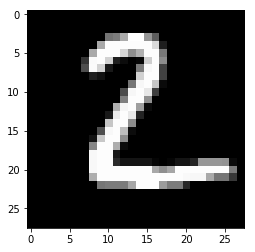

認識: 1 (99.78%) - 正しい：1


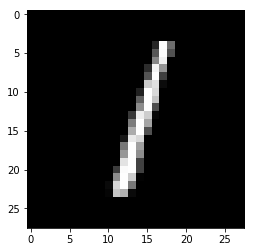

認識: 0 (100.00%) - 正しい：0


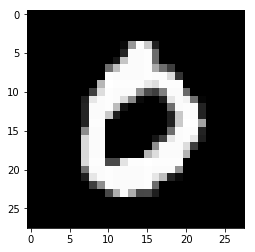

認識: 4 (90.37%) - 正しい：4


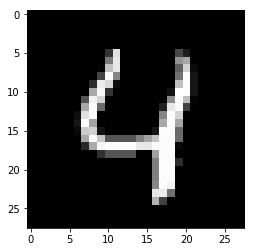

認識: 1 (99.83%) - 正しい：1


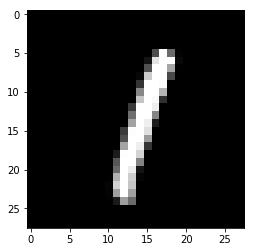

認識: 4 (98.81%) - 正しい：4


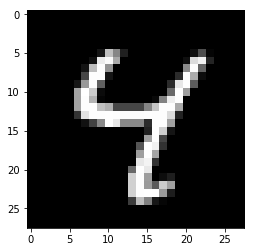

認識: 9 (98.28%) - 正しい：9


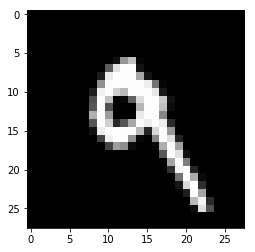

認識: 5 (65.65%) - 正しい：5


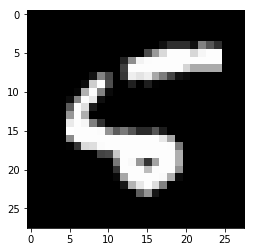

認識: 9 (99.70%) - 正しい：9


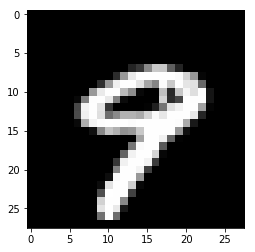

認識: 0 (99.99%) - 正しい：0


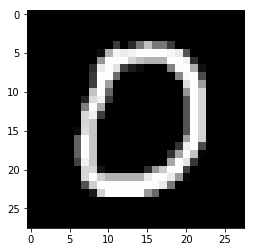

認識: 6 (99.81%) - 正しい：6


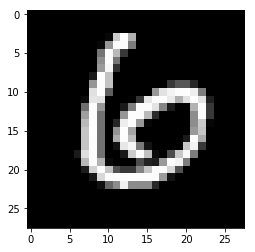

認識: 9 (99.89%) - 正しい：9


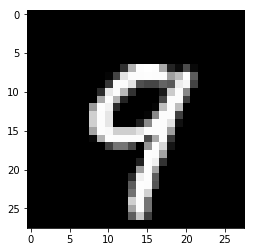

認識: 0 (100.00%) - 正しい：0


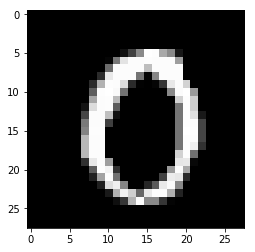

認識: 1 (99.94%) - 正しい：1


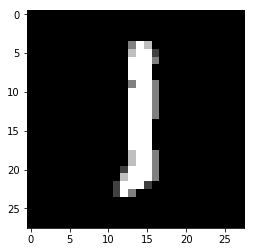

認識: 5 (99.84%) - 正しい：5


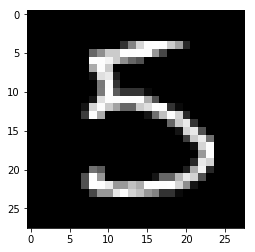

認識: 9 (99.95%) - 正しい：9


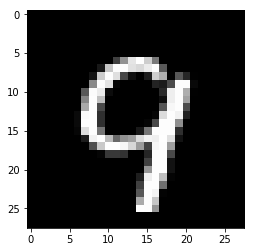

認識: 7 (99.93%) - 正しい：7


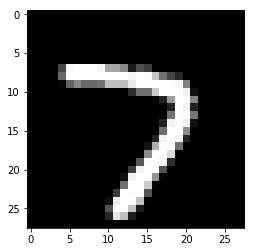

認識: 8 (64.23%) - 正しい：3


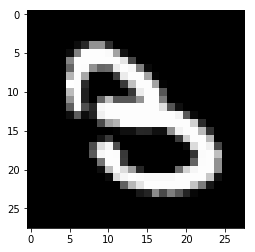

認識: 4 (99.98%) - 正しい：4


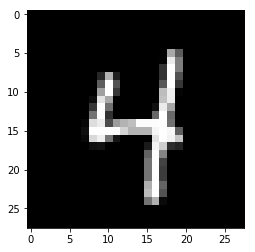

認識: 9 (80.45%) - 正しい：9


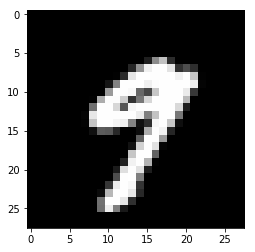

認識: 6 (99.54%) - 正しい：6


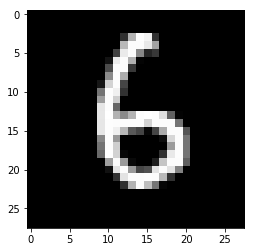

認識: 6 (99.05%) - 正しい：6


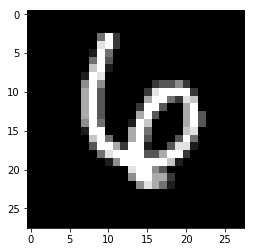

認識: 5 (99.94%) - 正しい：5


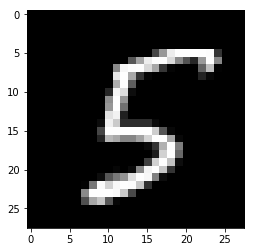

認識: 4 (99.62%) - 正しい：4


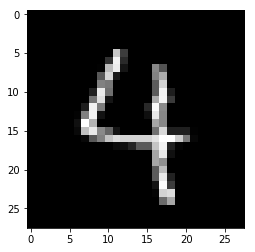

認識: 0 (100.00%) - 正しい：0


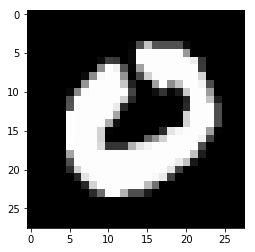

認識: 7 (99.98%) - 正しい：7


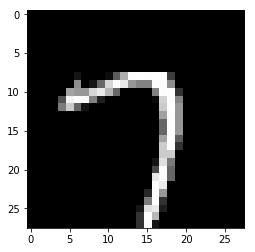

認識: 4 (99.90%) - 正しい：4


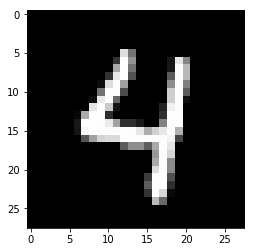

認識: 0 (100.00%) - 正しい：0


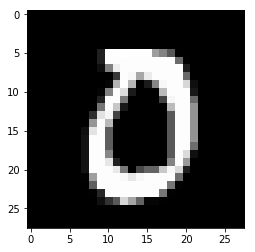

認識: 1 (99.49%) - 正しい：1


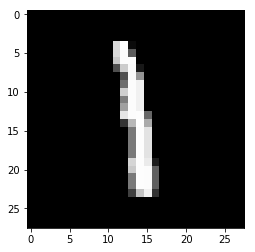

認識: 3 (99.97%) - 正しい：3


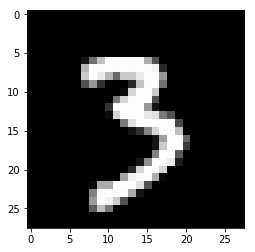

認識: 1 (98.67%) - 正しい：1


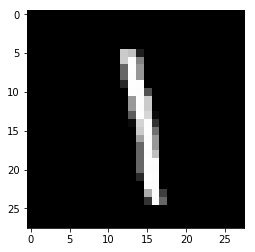

認識: 3 (99.63%) - 正しい：3


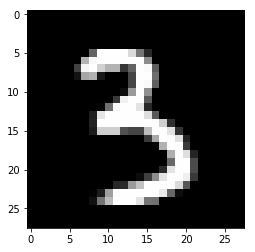

認識: 4 (68.82%) - 正しい：4


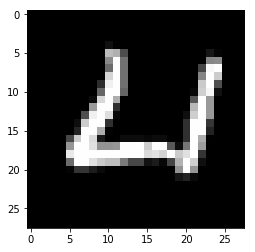

認識: 7 (99.99%) - 正しい：7


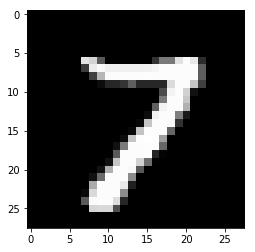

認識: 2 (100.00%) - 正しい：2


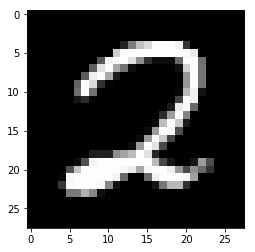

認識: 7 (99.99%) - 正しい：7


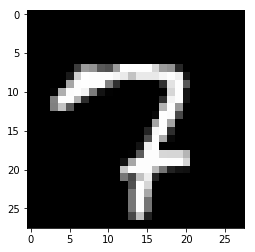

認識: 1 (99.92%) - 正しい：1


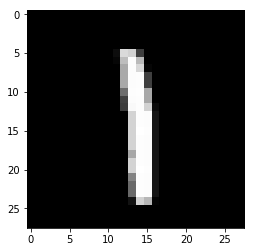

認識: 2 (99.03%) - 正しい：2


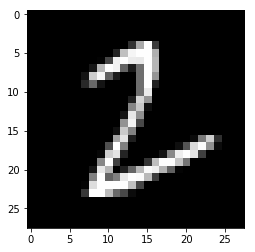

認識: 1 (99.90%) - 正しい：1


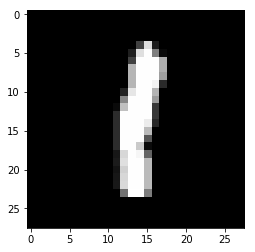

認識: 1 (99.85%) - 正しい：1


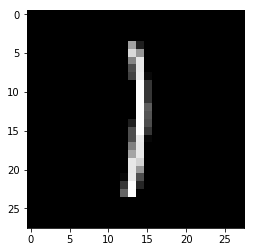

認識: 7 (99.96%) - 正しい：7


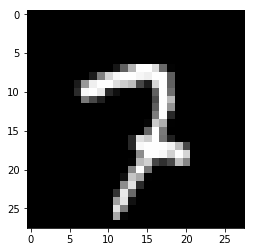

認識: 4 (99.61%) - 正しい：4


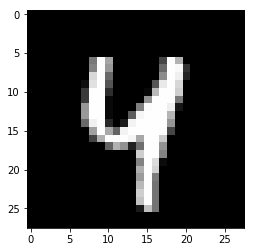

認識: 2 (100.00%) - 正しい：2


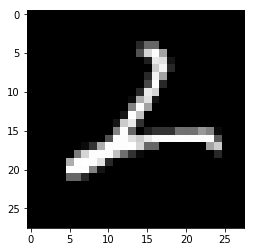

認識: 3 (99.59%) - 正しい：3


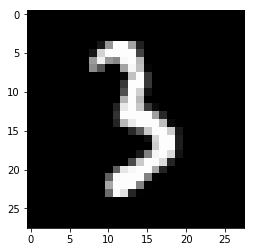

認識: 5 (99.75%) - 正しい：5


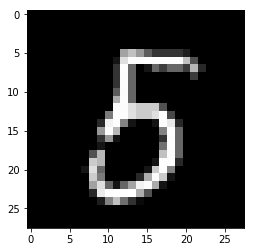

認識: 1 (99.07%) - 正しい：1


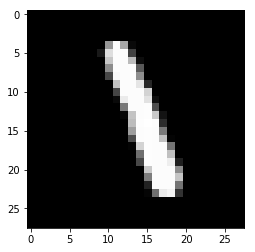

認識: 2 (100.00%) - 正しい：2


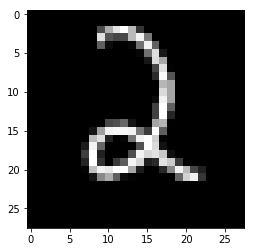

認識: 4 (99.76%) - 正しい：4


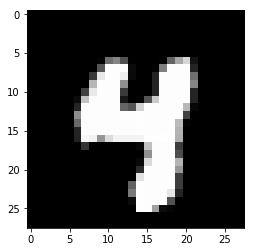

認識: 4 (99.94%) - 正しい：4


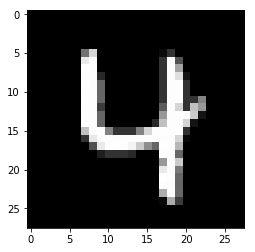

認識: 6 (99.92%) - 正しい：6


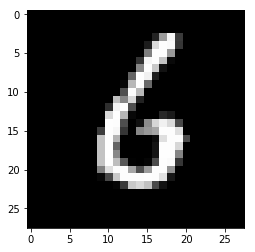

認識: 3 (100.00%) - 正しい：3


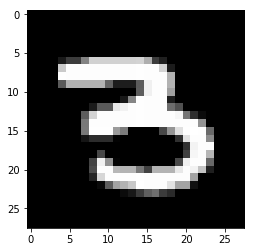

認識: 5 (99.53%) - 正しい：5


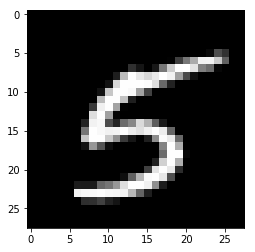

認識: 5 (96.06%) - 正しい：5


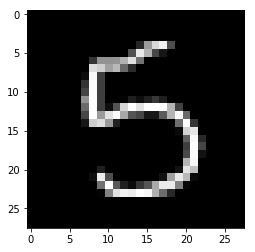

認識: 6 (99.99%) - 正しい：6


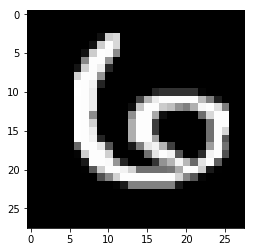

認識: 0 (99.98%) - 正しい：0


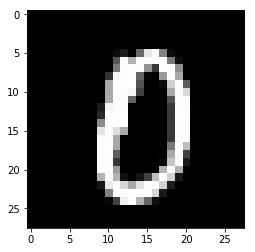

認識: 4 (99.81%) - 正しい：4


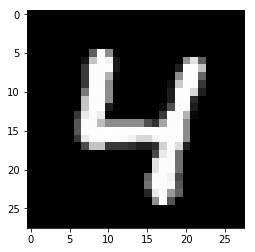

認識: 1 (99.00%) - 正しい：1


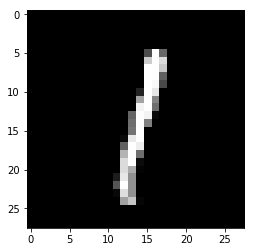

認識: 9 (99.62%) - 正しい：9


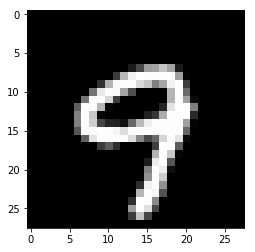

認識: 5 (95.43%) - 正しい：5


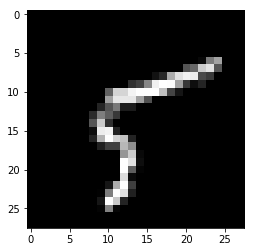

認識: 7 (100.00%) - 正しい：7


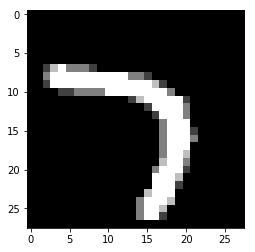

認識: 2 (92.64%) - 正しい：8


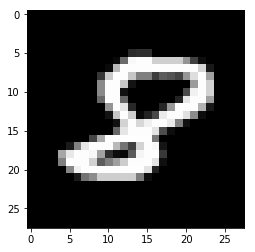

認識: 9 (95.64%) - 正しい：9


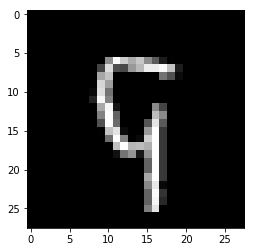

認識: 3 (91.88%) - 正しい：3


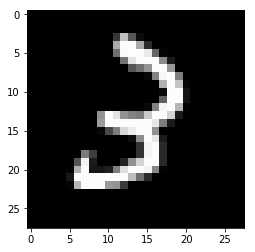

認識: 7 (99.92%) - 正しい：7


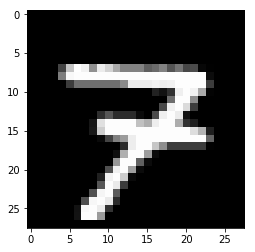

認識: 4 (98.79%) - 正しい：4


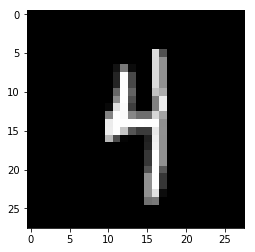

認識: 3 (93.20%) - 正しい：6


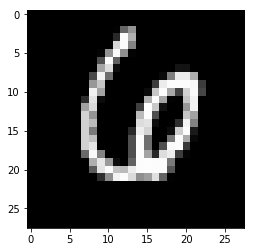

認識: 4 (99.88%) - 正しい：4


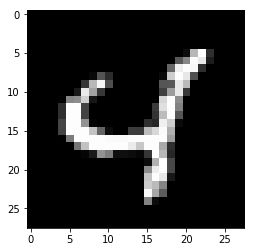

認識: 3 (99.83%) - 正しい：3


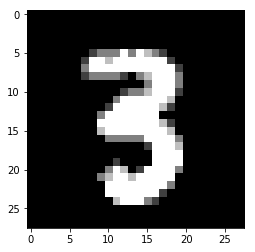

認識: 0 (99.55%) - 正しい：0


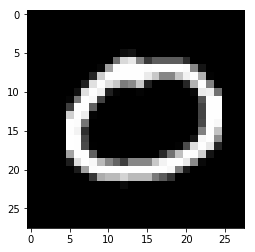

認識: 7 (100.00%) - 正しい：7


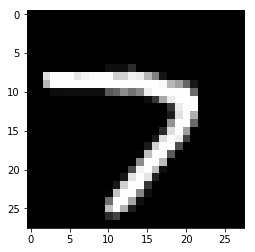

認識: 0 (100.00%) - 正しい：0


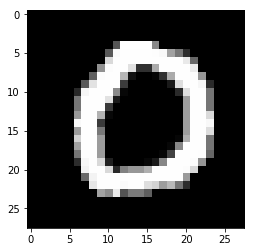

認識: 2 (98.64%) - 正しい：2


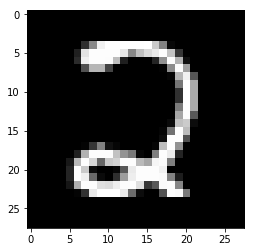

認識: 9 (99.26%) - 正しい：9


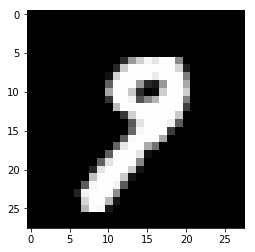

認識: 1 (99.74%) - 正しい：1


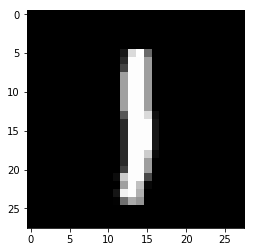

認識: 7 (99.99%) - 正しい：7


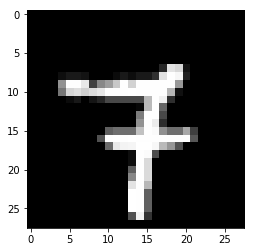

認識: 3 (98.33%) - 正しい：3


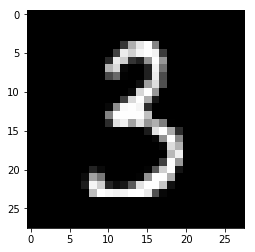

認識: 2 (99.91%) - 正しい：2


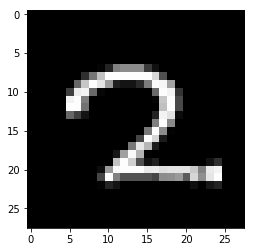

認識: 9 (99.70%) - 正しい：9


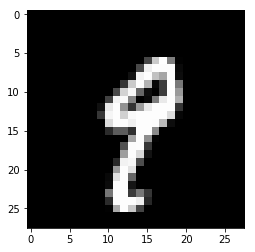

認識: 7 (100.00%) - 正しい：7


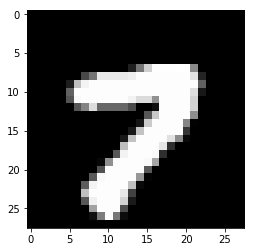

認識: 7 (90.80%) - 正しい：7


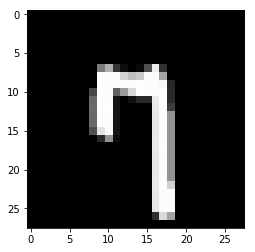

認識: 6 (99.85%) - 正しい：6


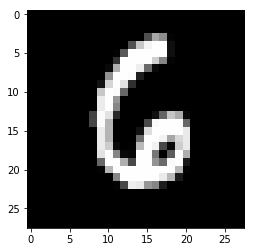

認識: 2 (100.00%) - 正しい：2


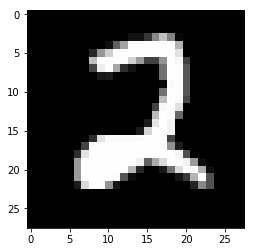

認識: 7 (97.86%) - 正しい：7


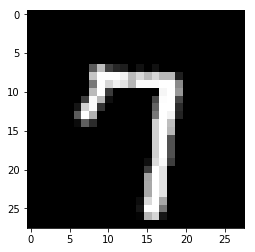

認識: 8 (99.94%) - 正しい：8


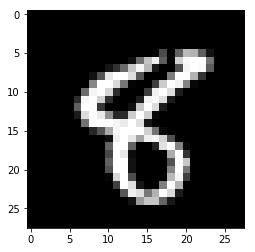

認識: 4 (100.00%) - 正しい：4


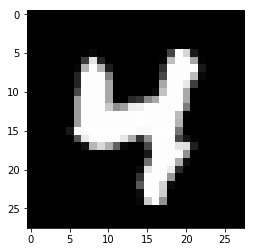

認識: 7 (100.00%) - 正しい：7


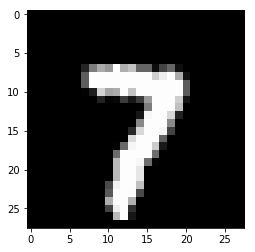

認識: 3 (95.06%) - 正しい：3


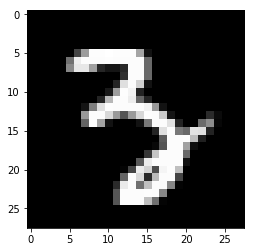

認識: 6 (100.00%) - 正しい：6


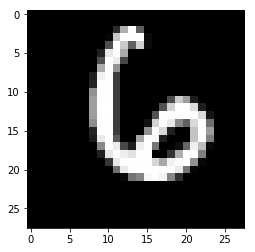

認識: 1 (99.99%) - 正しい：1


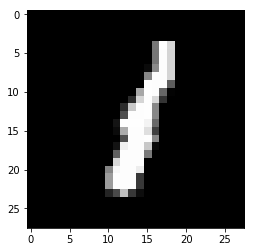

認識: 3 (99.95%) - 正しい：3


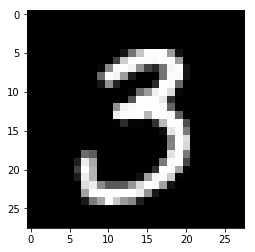

認識: 6 (100.00%) - 正しい：6


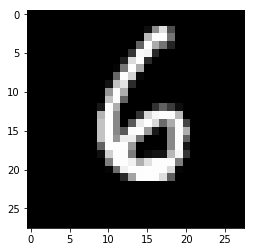

認識: 9 (87.56%) - 正しい：9


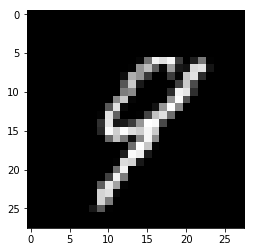

認識: 3 (99.35%) - 正しい：3


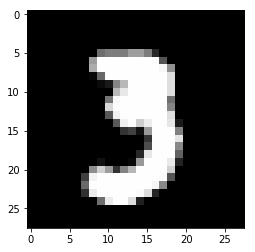

認識: 1 (99.99%) - 正しい：1


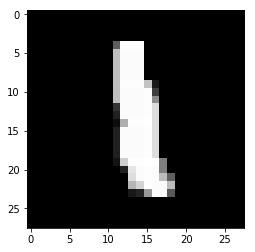

認識: 4 (100.00%) - 正しい：4


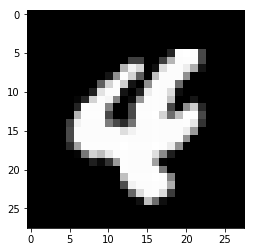

認識: 1 (88.89%) - 正しい：1


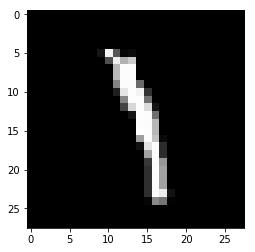

認識: 7 (99.75%) - 正しい：7


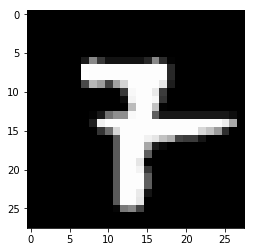

認識: 6 (99.73%) - 正しい：6


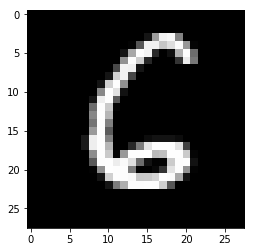

認識: 9 (100.00%) - 正しい：9


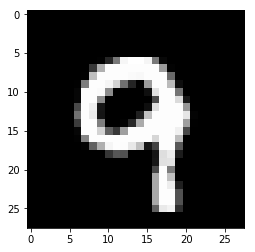

In [11]:
y_pred = model.predict(x_test_p)

for i in range(100):
    display_result(x_test[i], y_test[i], y_pred[i])

## テストデータで評価

全ての数字を確認するの大変なので、kerasの機能で、全てのテストデータを確認できる

In [12]:
model.evaluate(x_test_p, y_test_p)

10000/10000 [==============================] - 0s 16us/step


[0.16960487085897474, 0.9529]